In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
from sklearn.ensemble import RandomForestClassifier

In [5]:
from sklearn.pipeline import Pipeline


In [6]:
from sklearn.metrics import classification_report,accuracy_score


In [7]:
from sklearn.model_selection import train_test_split


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [9]:
import nltk

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
import xgboost as xgb 

In [14]:
import seaborn as sns

In [15]:
import matplotlib.pyplot as plt

In [16]:
from wordcloud import WordCloud

In [17]:
from collections import Counter

In [18]:
import re

In [19]:
from nltk.corpus import stopwords


In [20]:
from nltk.tokenize import word_tokenize


In [21]:
from nltk.stem import PorterStemmer


In [22]:
import tensorflow as tf

In [23]:
from tensorflow import keras

In [24]:
from keras.utils import to_categorical


In [25]:
from tensorflow.keras.models import Sequential


In [26]:
from tensorflow.keras.layers import Dense


In [27]:
df=pd.read_csv("Resume.csv")


In [28]:
df

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR
...,...,...,...,...
2479,99416532,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION
2480,24589765,"GOVERNMENT RELATIONS, COMMUNICATIONS ...","<div class=""fontsize fontface vmargins hmargin...",AVIATION
2481,31605080,GEEK SQUAD AGENT Professional...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION
2482,21190805,PROGRAM DIRECTOR / OFFICE MANAGER ...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION


In [29]:
df.isnull().sum()

ID             0
Resume_str     0
Resume_html    0
Category       0
dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           2484 non-null   int64 
 1   Resume_str   2484 non-null   object
 2   Resume_html  2484 non-null   object
 3   Category     2484 non-null   object
dtypes: int64(1), object(3)
memory usage: 77.8+ KB


In [31]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\himanshu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

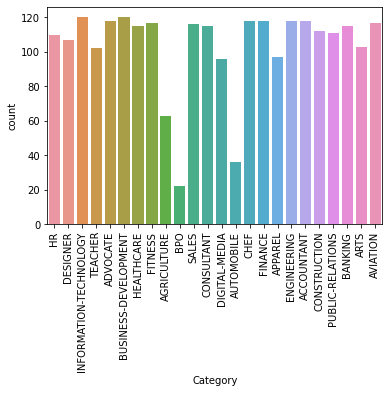

In [32]:
sns.countplot(x=df['Category'])
plt.xticks(rotation=90)
plt.show()

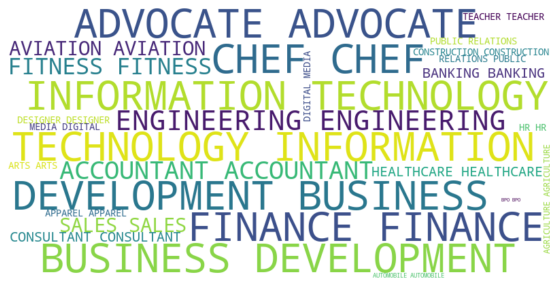

In [33]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Category']))

# Show the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Cleaning function
This code performs the following steps:

Removes links (URLs) using regular expressions.
Removes punctuation and special characters using regular expressions.
Removes extra spaces and underscores.
Removes numbers using regular expressions.
Converts the text to lowercase.
Removes leading and trailing spaces.
Removes Stopwords.
and If someone is using the "Resume_html" column for this analysis, then he must clean html tags

Removes HTML Tags.

In [34]:
def resume_cleaning(text):
    
    # Remove HTML tags 
    cleaned_text = re.sub(r'<.*?>', ' ', text)
    
    # Remove non-english characters, punctuation,special characters, digits, continous underscores and extra whitespace
    cleaned_text = re.sub('[^a-zA-Z]', ' ', cleaned_text)
    cleaned_text = re.sub(r'[^\w\s]|_', ' ', cleaned_text)
    cleaned_text = re.sub(r'\d+', ' ', cleaned_text)
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()
    cleaned_text=re.sub('http\S+\s', " ", cleaned_text)
    
    
    
    # Convert to lowercase
    cleaned_text = cleaned_text.lower()
    
    # Tokenize the cleaned text
    words = word_tokenize(cleaned_text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word not in stop_words]
    
    # Tokenize the cleaned text
    words = word_tokenize(cleaned_text)
    
    # Apply stemming
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in filtered_words]
    
    cleaned_text = ' '.join(stemmed_words)
    
    return cleaned_text

In [35]:
df['Cleaned_Resume']=df['Resume_str'].apply(lambda x:resume_cleaning(x))


In [36]:
df

,ID,Resume_str,Resume_html,Category,Cleaned_Resume
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr administr market associ hr administr summar...
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR,hr specialist us hr oper summari versatil medi...
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr director summari year experi recruit plu ye...
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr specialist summari dedic driven dynam year ...
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr manag skill highlight hr skill hr depart st...
...,...,...,...,...,...
2479,99416532,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION,rank sgt e non commiss offic charg brigad mail...
2480,24589765,"GOVERNMENT RELATIONS, COMMUNICATIONS ...","<div class=""fontsize fontface vmargins hmargin...",AVIATION,govern relat commun organiz develop director p...
2481,31605080,GEEK SQUAD AGENT Professional...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION,geek squad agent profession profil support spe...
2482,21190805,PROGRAM DIRECTOR / OFFICE MANAGER ...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION,program director offic manag summari highli pe...


In [37]:
# check any internal pdf are empty or not after cleaning procedure.

empty_rows = df[df['Cleaned_Resume'] == '']
print(empty_rows)

           ID             Resume_str  \
656  12632728                          

                                           Resume_html              Category  \
656  <div class="fontsize fontface vmargins hmargin...  BUSINESS-DEVELOPMENT   

    Cleaned_Resume  
656                 


# That means, after the text cleaning procedure, this PDF is empty. so we can drop this from the dataset.


In [38]:
# Drop 'Resume_str' and "Resume_html" columns
df=df.drop(['Resume_str', 'Resume_html'], axis=1)

In [39]:
# Drop the rows with empty cleaned text
df = df.drop(empty_rows.index)

# Since we get the 'cleaned_resume' text, we don't need 'resume_str' and 'resume_html' columns. We can drop it. Now, Our cleaning steps are complete!!



In [40]:
df['Cleaned_Resume'][0]

'hr administr market associ hr administr summari dedic custom servic manag year experi hospit custom servic manag respect builder leader custom focus team strive instil share enthusiast commit custom servic highlight focus custom satisfact team manag market savvi conflict resolut techniqu train develop skill multi tasker client relat specialist accomplish missouri dot supervisor train certif certifi ihg custom loyalti market segment hilton worldwid gener manag train certif accomplish trainer cross server hospit system hilton onq micro opera pm fidelio opera reserv system or holidex complet cours seminar custom servic sale strategi inventori control loss prevent safeti time manag leadership perform assess experi hr administr market associ hr administr dec current compani name citi state help develop polici direct coordin activ employ compens labor relat benefit train employe servic prepar employe separ notic relat document keep record benefit plan particip insur pension plan personnel t

# Let's create a word cloud for every category and see what happens.

In [41]:
# create list of all categories
categories = np.sort(df['Category'].unique())

In [42]:
categories

array(['ACCOUNTANT', 'ADVOCATE', 'AGRICULTURE', 'APPAREL', 'ARTS',
       'AUTOMOBILE', 'AVIATION', 'BANKING', 'BPO', 'BUSINESS-DEVELOPMENT',
       'CHEF', 'CONSTRUCTION', 'CONSULTANT', 'DESIGNER', 'DIGITAL-MEDIA',
       'ENGINEERING', 'FINANCE', 'FITNESS', 'HEALTHCARE', 'HR',
       'INFORMATION-TECHNOLOGY', 'PUBLIC-RELATIONS', 'SALES', 'TEACHER'],
      dtype=object)

In [43]:
# create new df for corpus and category
df_categories = [df[df['Category'] == category].loc[:, ['Cleaned_Resume', 'Category']] for category in categories]

In [44]:
df_categories

[                                         Cleaned_Resume    Category
 1808  account profession summari current account cit...  ACCOUNTANT
 1809  account summari innov energet account profici ...  ACCOUNTANT
 1810  account highlight microsoft offic intermedi mi...  ACCOUNTANT
 1811  account profession summari inpati outpati reco...  ACCOUNTANT
 1812  account summari pursu excel dynam busi world o...  ACCOUNTANT
 ...                                                 ...         ...
 1921  gener account profession summari around year e...  ACCOUNTANT
 1922  staff account profession summari current gradu...  ACCOUNTANT
 1923  gener account summari year experienc professio...  ACCOUNTANT
 1924  project account career focu dedic focus profes...  ACCOUNTANT
 1925  senior account summari highli compet motiv rel...  ACCOUNTANT
 
 [118 rows x 2 columns],
                                         Cleaned_Resume  Category
 439  advoc profession summari conscienti attorney e...  ADVOCATE
 440  advoc s

In [45]:
def wordcloud(df):
    txt = ' '.join(txt for txt in df['Cleaned_Resume'])
    wordcloud = WordCloud(
        height=2000,
        width=4000
    ).generate(txt)

    return wordcloud

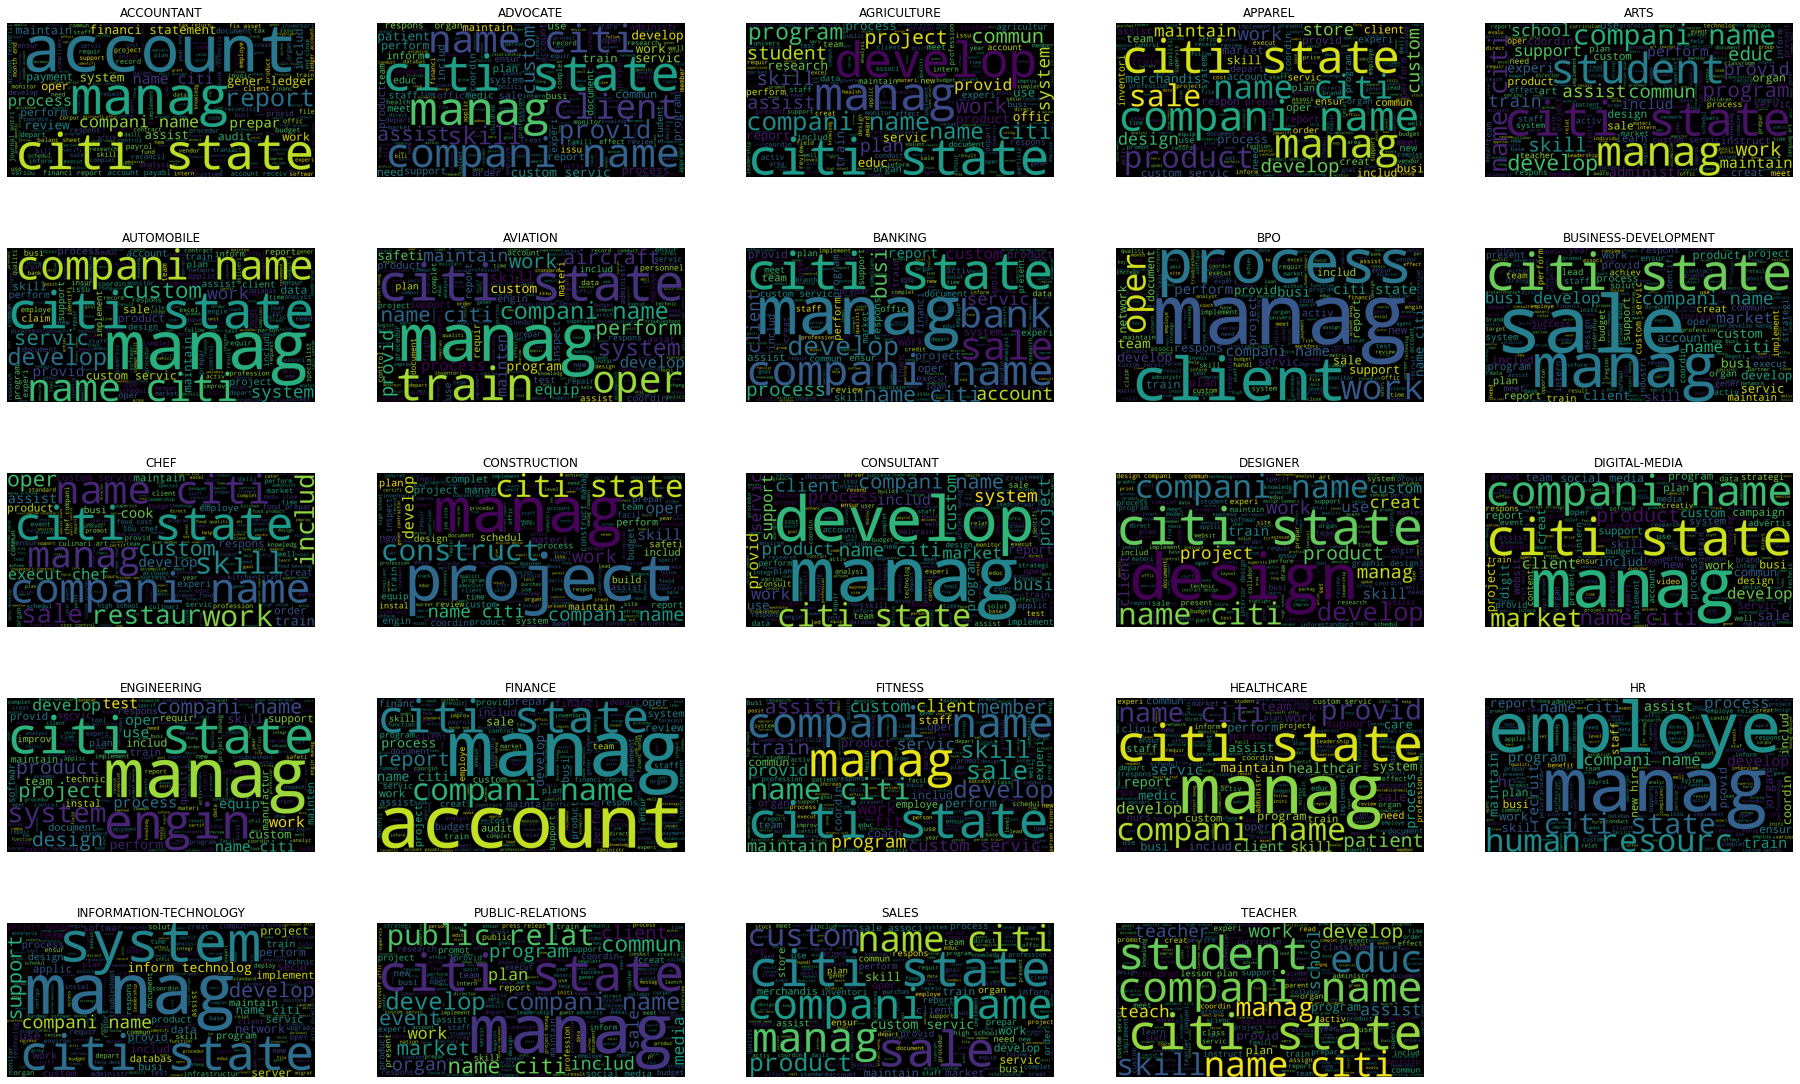

In [46]:
plt.figure(figsize=(32, 20))

for i, category in enumerate(categories):
    wc = wordcloud(df_categories[i])

    plt.subplot(5, 5, i + 1).set_title(category)
    plt.imshow(wc)
    plt.axis('off')
    plt.plot()

plt.show()
plt.close()

In [47]:
# try to remove extra word which are note important.
def remove_extra_word(text):
    
    extra_word=['compani', 'name', 'citi', 'state', 'work', 'manag'] # extra words
    words = text.split()  # Split the text into words
    
    # Filter out the extra words
    filter_word = [word for word in words if word not in extra_word]
    
    filter_text = ' '.join(filter_word)
    
    return filter_text


df['Cleaned_Resume']=df['Cleaned_Resume'].apply(lambda x:remove_extra_word(x))

In [48]:
#now label encoding of Category columns

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [49]:
df['Category']=encoder.fit_transform(df['Category'])


In [50]:
df.Category.unique()


array([19, 13, 20, 23,  1,  9, 18, 17,  2,  8, 22, 12, 14,  5, 10, 16,  3,
       15,  0, 11, 21,  7,  4,  6])

In [51]:
X_train, X_valid, y_train, y_valid = train_test_split(df['Cleaned_Resume'], df['Category'], test_size=0.15, random_state=42, stratify=df['Category'])


In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [53]:
# create tf-idf model. and set te max_fatures 800.
tfidf=TfidfVectorizer(stop_words='english',max_features=800)


In [54]:
tfidf_train_vectors = tfidf.fit_transform(X_train)
tfidf_valid_vectors =tfidf.transform(X_valid)

In [55]:
tfidf_train_vectors.shape

(2110, 800)

In [56]:
tfidf_valid_vectors.shape

(373, 800)

In [57]:
tfidf_train_vectors.shape[1]

800

In [58]:
# extracting feature names
tfidf.get_feature_names_out()

array(['abil', 'abl', 'academ', 'access', 'accomplish', 'accord',
       'account', 'accur', 'accuraci', 'achiev', 'acquisit', 'act',
       'action', 'activ', 'ad', 'adapt', 'addit', 'address', 'adher',
       'adjust', 'administ', 'administr', 'adob', 'advanc', 'advertis',
       'advis', 'advoc', 'affili', 'agenc', 'agent', 'agreement', 'aid',
       'air', 'aircraft', 'allow', 'america', 'american', 'analysi',
       'analyst', 'analyt', 'analyz', 'annual', 'answer', 'appli',
       'applic', 'appoint', 'approach', 'appropri', 'approv', 'april',
       'architectur', 'area', 'arrang', 'art', 'aspect', 'assembl',
       'assess', 'asset', 'assign', 'assist', 'associ', 'assur', 'attend',
       'attent', 'audit', 'august', 'author', 'autom', 'avail', 'averag',
       'aviat', 'awar', 'award', 'bachelor', 'background', 'balanc',
       'bank', 'base', 'basi', 'basic', 'behavior', 'benefit', 'best',
       'board', 'book', 'branch', 'brand', 'budget', 'build', 'built',
       'busi', '

# RandomForestClassifier

In [59]:
rfc=RandomForestClassifier()


In [60]:
rfc.fit(tfidf_train_vectors,y_train)

RandomForestClassifier()

In [61]:
y_pred=rfc.predict(tfidf_valid_vectors)

In [62]:
accuracy_score(y_valid,y_pred)

0.6568364611260054

In [63]:
print(classification_report(y_valid,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.83      0.73        18
           1       0.57      0.67      0.62        18
           2       1.00      0.22      0.36         9
           3       0.60      0.20      0.30        15
           4       0.25      0.07      0.11        15
           5       0.00      0.00      0.00         5
           6       0.84      0.89      0.86        18
           7       0.73      0.65      0.69        17
           8       0.00      0.00      0.00         3
           9       0.48      0.78      0.60        18
          10       0.86      0.67      0.75        18
          11       0.83      0.88      0.86        17
          12       0.40      0.12      0.18        17
          13       0.82      0.88      0.85        16
          14       0.75      0.64      0.69        14
          15       0.79      0.83      0.81        18
          16       0.68      0.72      0.70        18
          17       0.71    

C:\Users\himanshu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\himanshu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\himanshu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# LogisticRegression

In [64]:
lr=LogisticRegression()


In [65]:
lr.fit(tfidf_train_vectors,y_train)

LogisticRegression()

In [66]:
y_pred=lr.predict(tfidf_valid_vectors)

In [67]:
accuracy_score(y_valid,y_pred)

0.6621983914209115

In [68]:
print(classification_report(y_valid,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.89      0.74        18
           1       0.42      0.56      0.48        18
           2       1.00      0.33      0.50         9
           3       0.50      0.33      0.40        15
           4       0.33      0.13      0.19        15
           5       1.00      0.20      0.33         5
           6       0.88      0.78      0.82        18
           7       0.86      0.71      0.77        17
           8       0.00      0.00      0.00         3
           9       0.50      0.83      0.62        18
          10       0.86      0.67      0.75        18
          11       0.81      0.76      0.79        17
          12       0.60      0.18      0.27        17
          13       0.82      0.88      0.85        16
          14       0.80      0.57      0.67        14
          15       0.74      0.78      0.76        18
          16       0.93      0.72      0.81        18
          17       0.86    

C:\Users\himanshu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\himanshu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\himanshu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# KNeighborsClassifier

In [69]:
knc=KNeighborsClassifier()


In [70]:
knc.fit(tfidf_train_vectors,y_train)

KNeighborsClassifier()

In [71]:
y_pred=knc.predict(tfidf_valid_vectors)

In [72]:
accuracy_score(y_valid,y_pred)

0.5415549597855228

In [73]:
print(classification_report(y_valid,y_pred))

              precision    recall  f1-score   support

           0       0.48      0.83      0.61        18
           1       0.29      0.61      0.39        18
           2       0.60      0.33      0.43         9
           3       0.27      0.20      0.23        15
           4       0.42      0.33      0.37        15
           5       0.40      0.40      0.40         5
           6       0.70      0.39      0.50        18
           7       0.50      0.53      0.51        17
           8       0.00      0.00      0.00         3
           9       0.39      0.72      0.51        18
          10       0.92      0.61      0.73        18
          11       0.71      0.59      0.65        17
          12       0.09      0.06      0.07        17
          13       0.75      0.75      0.75        16
          14       0.58      0.50      0.54        14
          15       0.63      0.67      0.65        18
          16       0.69      0.50      0.58        18
          17       0.80    

C:\Users\himanshu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\himanshu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\himanshu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# XGBClassifier

In [74]:
xgb_i=xgb.XGBClassifier()

In [75]:
xgb_i.fit(tfidf_train_vectors,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [76]:
y_pred=xgb_i.predict(tfidf_valid_vectors)

In [77]:
accuracy_score(y_valid,y_pred)

0.6729222520107239

In [78]:
print(classification_report(y_valid,y_pred))

              precision    recall  f1-score   support

           0       0.54      0.72      0.62        18
           1       0.73      0.89      0.80        18
           2       0.75      0.33      0.46         9
           3       0.45      0.33      0.38        15
           4       0.45      0.33      0.38        15
           5       0.50      0.20      0.29         5
           6       0.88      0.78      0.82        18
           7       0.73      0.47      0.57        17
           8       1.00      0.33      0.50         3
           9       0.57      0.67      0.62        18
          10       0.93      0.72      0.81        18
          11       0.88      0.82      0.85        17
          12       0.36      0.24      0.29        17
          13       0.71      0.94      0.81        16
          14       0.67      0.57      0.62        14
          15       0.71      0.83      0.77        18
          16       0.81      0.72      0.76        18
          17       0.64    

# ANN

In [79]:
# Convert sparse matrices to dense arrays
tfidf_train_arrays = tfidf_train_vectors.toarray()
tfidf_valid_arrays = tfidf_valid_vectors.toarray()


In [80]:
y_train_label = to_categorical(y_train, num_classes=24)
y_valid_label = to_categorical(y_valid, num_classes=24)

In [81]:
model = Sequential()
model.add(Dense(1000, input_dim=tfidf_train_arrays.shape[1]))
model.add(Dense(500, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(24, activation='softmax'))  

In [82]:
model.compile(optimizer='adam',
    loss="categorical_crossentropy",metrics=['accuracy'])

In [83]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              801000    
                                                                 
 dense_1 (Dense)             (None, 500)               500500    
                                                                 
 dense_2 (Dense)             (None, 200)               100200    
                                                                 
 dense_3 (Dense)             (None, 24)                4824      
                                                                 
Total params: 1,406,524
Trainable params: 1,406,524
Non-trainable params: 0
_________________________________________________________________


In [84]:
history = model.fit(tfidf_train_arrays, y_train_label, epochs=10, batch_size=32, validation_data=(tfidf_valid_arrays, y_valid_label))

# Evaluate the model on the validation set
loss, accuracy = model.evaluate(tfidf_valid_arrays, y_valid_label)
print(f"Validation loss: {loss:.4f}")
print(f"Validation accuracy: {accuracy:.4f}")


Epoch 1/10
66/66 [==============================] - 1s 9ms/step - loss: 2.1242 - accuracy: 0.4370 - val_loss: 1.5113 - val_accuracy: 0.6113
Epoch 2/10
66/66 [==============================] - 1s 8ms/step - loss: 1.1475 - accuracy: 0.6682 - val_loss: 1.4096 - val_accuracy: 0.5979
Epoch 3/10
66/66 [==============================] - 0s 7ms/step - loss: 0.6810 - accuracy: 0.8000 - val_loss: 1.4333 - val_accuracy: 0.6166
Epoch 4/10
66/66 [==============================] - 0s 7ms/step - loss: 0.3973 - accuracy: 0.8882 - val_loss: 1.6481 - val_accuracy: 0.6139
Epoch 5/10
66/66 [==============================] - 0s 7ms/step - loss: 0.1925 - accuracy: 0.9498 - val_loss: 1.7677 - val_accuracy: 0.6139
Epoch 6/10
66/66 [==============================] - 1s 10ms/step - loss: 0.0996 - accuracy: 0.9777 - val_loss: 1.9288 - val_accuracy: 0.5898
Epoch 7/10
66/66 [==============================] - 1s 8ms/step - loss: 0.0398 - accuracy: 0.9943 - val_loss: 2.0536 - val_accuracy: 0.6139
Epoch 8/10
66/66 [=

# check training accuracy and validation accuracy and traning loss and validation loss¶


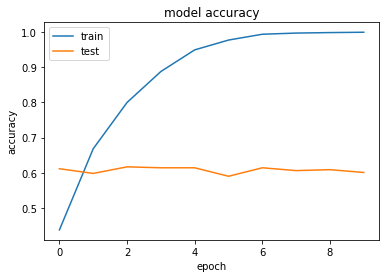

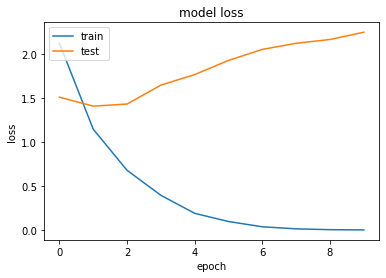

In [85]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [87]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl', 'wb'))
pickle.dump(rfc,open('best_clf.pkl', 'wb'))